In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings( "ignore")
%matplotlib inline
card_df = pd.read_csv(r'C:\Users\82105\Desktop\creditcard.csv')
card_df .head(3)
# class 값으로 0 일경우 정상, 1일 경우 사기

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [49]:
from sklearn.model_selection import train_test_split

#인자로 받은 DataFrame을 복사한 뒤 Time 칼럼만 삭제하고 복사된 DataFraem 반환

def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time', axis=1, inplace=True)
    return df_copy

In [50]:
# 사전 데이터 가공 후 학습과 테스트 데이터 세트를 반환
def get_train_test_dataset(df=None):
    df_copy = get_preprocessed_df(df)
    X_features = df_copy.iloc[:, :-1]
    y_target = df_copy.iloc[:, -1]
    X_train, X_test, y_train, y_test = \
    train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)
# train_test_split()으로 학습과 테스트 데이터 분할/ stratify 분할 사용하여 클래스 비율 조정

In [51]:
print("학습 데이터 레이블 값 비율")
print(y_train.value_counts()/y_train.shape[0] * 100)
print("테스트 데이터 레이블 값 비율")
print(y_test.value_counts()/y_test.shape[0] * 100)

학습 데이터 레이블 값 비율
Class
0    99.827451
1     0.172549
Name: count, dtype: float64
테스트 데이터 레이블 값 비율
Class
0    99.826785
1     0.173215
Name: count, dtype: float64


In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# 모델 학습
lr_clf =LogisticRegression(max_iter=1000) 
lr_clf.fit(X_train, y_train)

# 예측
lr_pred = lr_clf.predict(X_test)
lr_pred_proba =lr_clf.predict_proba(X_test)[ :, 1]

# get_clf_eval() 함수 이용해 평가 >  평가 함수 정의 (재현율, 정밀도 등등 평가)

def get_clf_eval(y_test, y_pred, y_pred_proba):
    cm = confusion_matrix(y_test, y_pred)
    print("오차행렬")
    print(cm)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"정확도: {accuracy:.4f}")

    precision = precision_score(y_test, y_pred)
    print(f"정밀도: {precision:.4f}")

    recall = recall_score(y_test, y_pred)
    print(f"재현율: {recall:.4f}")

    f1 = f1_score(y_test, y_pred)
    print(f"F1: {f1:.4f}")

    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f"ROC AUC Score: {roc_auc:.4f}")


get_clf_eval(y_test , lr_pred , lr_pred_proba)

오차행렬
[[85280    15]
 [   57    91]]
정확도: 0.9992
정밀도: 0.8585
재현율: 0.6149
F1: 0.7165
ROC AUC Score: 0.9731


In [53]:
# 인자로 사이킷런의 Estimator 객체와 학습/테스트 데이터 세트를 입력받아서 학습/예측/평가 수행

def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[: , 1] 
    get_clf_eval(tgt_test , pred , pred_proba)

In [54]:
from lightgbm import LGBMClassifier
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test,tgt_train=y_train, tgt_test=y_test)

[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.062206 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

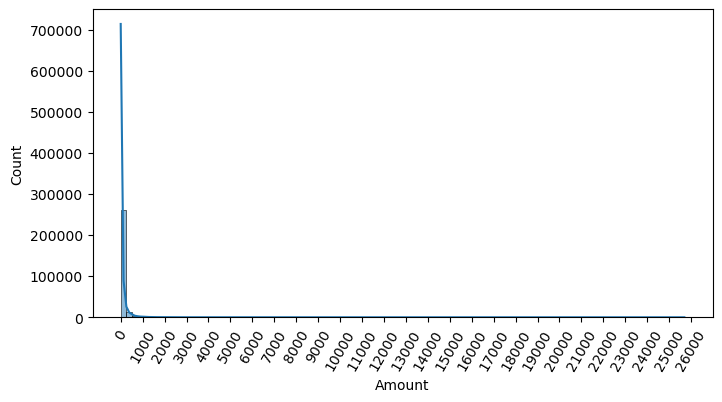

In [55]:
#데이터 분포도 변환 후 모델 학습/예측/평가 >> 로지스틱 회귀는 선형 모델이기때문에 정규분포 형태 유지 선호
import seaborn as sns
plt.figure(figsize=(8, 4))
plt.xticks(range(0, 30000, 1000), rotation=60)           
sns.histplot(card_df['Amount'], bins=100, kde=True)
plt .show()

In [62]:
# Amount를 표준 정규 분포 형태로 변환한 뒤에 로지스틱 회귀의 예측 성능 확인
from sklearn.preprocessing import StandardScaler 
def get_preprocessed_df(df=None):  
    df_copy = df.copy() 
    scaler = StandardScaler()
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1,1)) # >> 정규화
    # 변환된 Amount를 Amount_Scaled라고 피처명 변경후 DataFrame 맨 앞 칼럼으로 입력
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    # 기존의 Time, Amount 피처 삭제
    df_copy.drop( ['Time' , 'Amount'] , axis=1 , inplace=True) 
    return df_copy

In [64]:
# Amount를 정규 분포 형태로 변환 후 로지스틱 회귀 및 LighGBM 수행

# 데이터 분할
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)


print('### 로지스틱 회귀 예측 성능 ###')
lr_clf = LogisticRegression(max_iter=1000)
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)


### 로지스틱 회귀 예측 성능 ###
오차행렬
[[85281    14]
 [   55    93]]
정확도: 0.9992
정밀도: 0.8692
재현율: 0.6284
F1: 0.7294
ROC AUC Score: 0.9706
### LightGBM 예측 성능 ###
[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.049936 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

In [66]:
# 정규 분포 형태로 Amount 피처값을 변환 후 적용한 로지스틱 회귀는 정밀도와 재현율이 저하되었고 LightGM의 경우는 약간 정밀도와 재현율이 저하되었지만 성능 상의 변경은 없다


# 로그 변환을 수행 함수
def get_preprocessed_df(df=None):    
    df_copy =df.copy()
    # 넘파이의 log1p()를 이용해 Amount를 로그 변환
    amount_n =np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n) 
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    return df_copy



In [ ]:
# 로그 변환 후 로지스틱 회귀와 LightGBM 모델 적용하여 예측 성능 파악
import warnings

# 경고 무시 설정
warnings.filterwarnings("ignore", category=UserWarning)

# 데이터 분할
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###') 
lr_clf = LogisticRegression(max_iter=1000)
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

<Axes: >

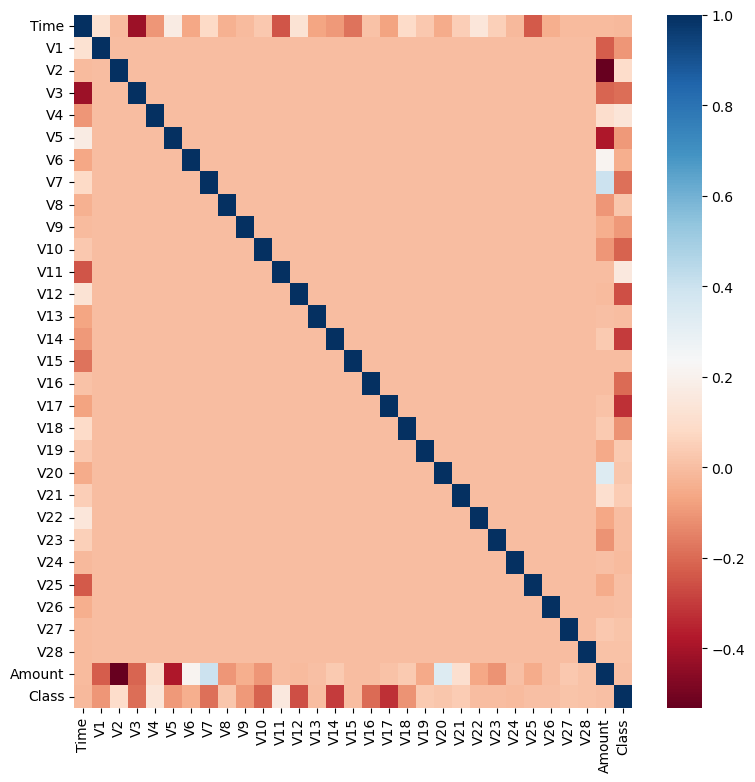

In [68]:
# 로지스틱 회귀의 경우 원본 데이터 대비 정밀도는 향상되었지만 재현율은 저하, LightGBM의 경우 재현율이 향상

# 이상치 데이터 제거 후 모델 학습/ 예측/ 평가
# IQR 방식 :  사분위 값의 편차를 이용하는 방식 보통 IQR 값 * 1.5로 최대 최소 결정 초과 ,미달을 이상치로 간주

# corr()를 이용해 피처별로 상관도를 구한 뒤 heatmap으로 시각화
import seaborn as sns
plt.figure(figsize=(9, 9)) 
corr = card_df.corr() 
sns.heatmap(corr, cmap='RdBu')

In [70]:
# 양의 상관 관계가 높을 수록 진한 파랑, 음의 상관관계가 높을 수록 진한 빨강, class와 음의 상관관계가 높은 v14, v17 중 v14에 대해서만 이상치 제거

import numpy as np
def get_outlier(df=None, colunm=None, weight=1.5):
    #fraud에 해당하는 colunm데이터만 추출, 1/4 분위와 3/4 q분위 지점을 구하고 이에 기반해 IQR 계산
    fraud = df[df['Class']==1][colunm]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight

    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index

In [72]:
outlier_index = get_outlier(df=card_df, colunm='V14', weight=1.5)
print('이상치 데이터 인덱스:', outlier_index)

이상치 데이터 인덱스: Index([8296, 8615, 9035, 9252], dtype='int64')


In [74]:
# 이상치 추출 후 이를 삭제하는 로직을 get_processed_df()함수에 추가
def get_preprocessed_df(df=None):
    df_copy =df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0,'Amount_Scaled', amount_n) 
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    # 이상치 데이터 삭제하는 로직 추가
    outlier_index = get_outlier(df=df_copy, colunm='V14', weight=1.5)
    df_copy.drop(outlier_index, axis=0, inplace=True)
    return df_copy

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###') 
lr_clf = LogisticRegression(max_iter=1000)
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차행렬
[[85280    15]
 [   48    98]]
정확도: 0.9993
정밀도: 0.8673
재현율: 0.6712
F1: 0.7568
ROC AUC Score: 0.9725
### LightGBM 예측 성능 ###
[LightGBM] [Info] Number of positive: 342, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.062829 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199362, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

In [75]:
# 이상치 데이터를 제거한뒤 둘 다 예측 성능이 크게 향상됨!

#SMOTE 오버 샘플링 적용 후 모델 학습/예측/평가 >>> 반드시!! 학습 데이터 세트만 오버 샘플링 함! 검증 데이터는 NONO

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state= 0)
X_train_over, y_train_over = smote.fit_resample(X_train,y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트 :', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트 :', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포 : \n', pd.Series(y_train_over).value_counts())


SMOTE 적용 전 학습용 피처/레이블 데이터 세트 : (199362, 29) (199362,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트 : (398040, 29) (398040,)
SMOTE 적용 후 레이블 값 분포 : 
 Class
0    199020
1    199020
Name: count, dtype: int64


In [78]:
# 적용 전 피처 값의 2배로 불어남, 0과 1의 레이블 값은 동일하게 생성

# 이를 로지스틱 회귀 모델을 학습한 뒤 성능 평가
# 필요한 라이브러리 임포트
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 이후에 데이터셋을 준비하고, 모델을 훈련하는 코드를 작성하세요.

# 로지스틱 회귀 모델 학습 및 평가
lr_clf = LogisticRegression(max_iter=1000)
get_model_train_eval(lr_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)



오차행렬
[[82933  2362]
 [   11   135]]
정확도: 0.9722
정밀도: 0.0541
재현율: 0.9247
F1: 0.1022
ROC AUC Score: 0.9736


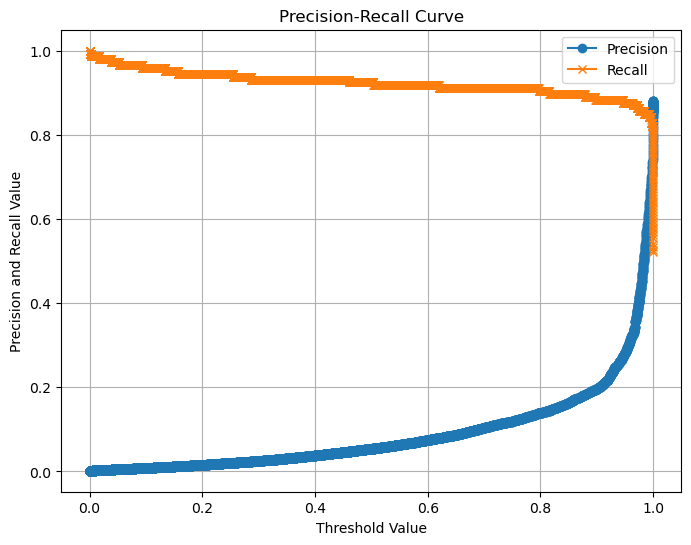

In [80]:
# 로지스틱 회귀 모델의 경우 오버 샘플링 되었을 때 재현율이 크게 증가하지만 정밀도가 급격히 하락
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

def precision_recall_curve_plot(y_test, y_pred_proba):
    # 정밀도와 재현율 계산
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
    
    # 플롯 생성
    plt.figure(figsize=(8, 6))
    plt.plot(thresholds, precision[:-1], marker='o', label='Precision')
    plt.plot(thresholds, recall[:-1], marker='x', label='Recall')
    
    plt.title('Precision-Recall Curve')
    plt.xlabel('Threshold Value')
    plt.ylabel('Precision and Recall Value')
    plt.grid()
    plt.legend()
    plt.show()

# 로지스틱 회귀 모델을 사용하여 예측 확률 계산
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]

# 정밀도-재현율 곡선 시각화
precision_recall_curve_plot(y_test, lr_pred_proba)

In [82]:
# 임계값이 0.99이하에서는 재현율이 매우 좋고 정밀도가 극단적으로 낮다가 0.99이상에서는 반대되는 양상

# LightGBM 모델을 오버샘플링된 세트로 학습/예측/ 평가 수행

lgbm_clf = LGBMClassifier(n_estimators=1000,num_leaves=64, n_jobs=-1,boost_from_average=False) 
get_model_train_eval(lgbm_clf, ftr_train=X_train_over, ftr_test=X_test,tgt_train=y_train_over, tgt_test=y_test)

[LightGBM] [Info] Number of positive: 199020, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.142012 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 398040, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

In [ ]:
# 정밀도보다 재현율 지표를 높일 때 SMOTE 사용하면 좋음